# Random Forest classifiers

In this section of the tutorial, we will investigate the use of Random Forest classifiers in `sklearn`. As for all models in the `sklearn` framework, Random Forests mainly rely on `fit(X, y)` and `predict(X)` methods. Once fitted, relative importance of the features can be accessed _via_ the `feature_importances_` property.

More information about the use of Random Forests for Classification in `sklearn` can be found at: <http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>.

To begin with, let us import libraries we need and define a function to plot a fitted classifier (this function will not be specific to Random Forests) in 2D.

In [1]:
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

def plot_decision(clf, X, y):
    # Build a 2D grid and perform classification using clf on this grid
    xx, yy = np.meshgrid(np.arange(X[:,0].min() - .5, X[:,0].max() + .5, .01),
                         np.arange(X[:,1].min() - .5, X[:,1].max() + .5, .01))
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, zz, alpha=.2)
    # Plot data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors="none")
    # Set figure coordinate limits
    plt.xlim(X[:,0].min() - .5, X[:,0].max() + .5)
    plt.ylim(X[:,1].min() - .5, X[:,1].max() + .5)

Then, we load some data and train a forest made of a single tree (`n_estimators=1`):

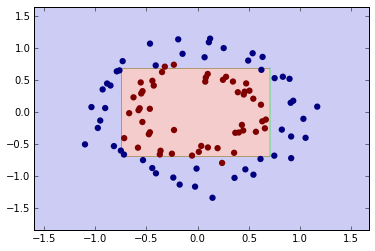

In [2]:
X, y = make_circles(n_samples=100, random_state=0, noise=.1, factor=.6)
clf = RandomForestClassifier(n_estimators=1)
clf.fit(X, y)
plot_decision(clf, X, y)

Now, if we vary the number of trees in the model, things can change a little bit:

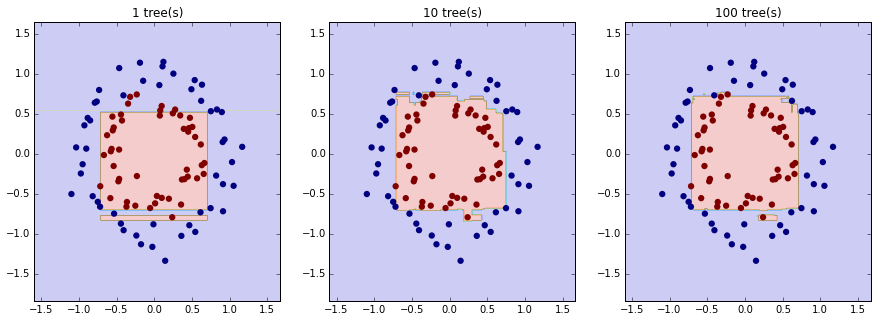

In [3]:
plt.figure(figsize=(15, 5))
for i, n_trees in enumerate([1, 10, 100]):
    plt.subplot(1, 3, i + 1)
    clf = RandomForestClassifier(n_estimators=n_trees)
    clf.fit(X, y)
    plot_decision(clf, X, y)
    plt.title("%d tree(s)" % n_trees)

Once a model fitted, we can have a look at relative importance of the different features:

In [4]:
clf.feature_importances_

array([ 0.51203256,  0.48796744])

To get an idea, we can add random components and see what happens:

In [5]:
X, y = make_circles(n_samples=100, random_state=0, noise=.1, factor=.8)
X = np.hstack((X, np.random.randn(100, 10)))
clf = RandomForestClassifier(n_estimators=1)
clf.fit(X, y)
print(clf.feature_importances_)

[ 0.0575908   0.11610129  0.          0.11942231  0.03220612  0.02683843
  0.16252247  0.18006905  0.          0.16695014  0.07375341  0.06454597]


Surprisingly enough, first 2 dimensions do not seem to be the most informative. This is because we do not have sufficient amount of data to assess feature importance. If we add some:

In [6]:
for n in [100, 1000, 10000]:
    X, y = make_circles(n_samples=n, random_state=0, noise=.1, factor=.8)
    X = np.hstack((X, np.random.randn(n, 10)))
    clf = RandomForestClassifier(n_estimators=1)
    clf.fit(X, y)
    print(n, clf.feature_importances_)

100 [ 0.07496252  0.20989246  0.04931562  0.          0.07087674  0.00469673
  0.          0.18745119  0.17983667  0.03354804  0.15334768  0.03607235]
1000 [ 0.16370021  0.14227873  0.05757137  0.06542267  0.06816396  0.05583518
  0.06743806  0.08843608  0.07297787  0.07496945  0.05991353  0.0832929 ]
10000 [ 0.25051345  0.21299317  0.04920292  0.06046434  0.05091443  0.04316915
  0.04738491  0.05091991  0.05397139  0.06283608  0.05582162  0.06180863]
